<a href="https://colab.research.google.com/github/dquintani/vacunacion/blob/main/vacuna_codigo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#DRIVE

In [1]:
directory = ""
# from google.colab import drive
# drive.mount("/drive")
# directory = "/drive/My Drive/Colab Notebooks/vacunacion"


#interactive table
#from vega_datasets import data
#%load_ext google.colab.data_table

# Dependencias

In [2]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
plt.style.use("dark_background")

import datetime 
from datetime import date


#dates
import matplotlib.dates as mdates

#mtick for percentages in axes
import matplotlib.ticker as mtick

#colormaps
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

import matplotlib.image as mpimg

# Variables y Funciones


In [3]:
#VARIABLES
ordenado = ['Bolivia', 'La Paz','Cochabamba','Santa Cruz', 'Oruro', 'Potosí', 'Chuquisaca','Tarija','Beni','Pando']
color_vac_parcial1 = 	"orange"
color_vac_parcial2 = "orange"
color_vac_completa1 = "green"
color_vac_completa2 = "green"
color_total_dosis1 = "#afeeee"
color_total_dosis2 = "#add8e6"

background_color1 = "black"
background_color2 = "black"

atribucion = "Datos del Ministerio de Salud vía @mauforonda y @BolCuantas. Visualización de BoliGráfica"

In [4]:
def annotate_bar(series, axis, text_color="black", fontsize=12, x_offset=0, y_offset=0, edgecolor="black", facecolor="white", alpha=0.5, start_text="", end_text=""):
  for p in axs[axis].patches:
    axs[axis].annotate(start_text + str(p.get_width()) + end_text,
        xy = (p.get_width() + x_offset, p.get_y() + y_offset),
        fontsize = fontsize,
         color = text_color,
          bbox={
            'edgecolor': edgecolor,
            'facecolor': facecolor, 
            'alpha': alpha}
           )


def annotate_last_flat(df, column_index, axis = 0, text_color="black", fontsize=12, offset_days=0, edgecolor="black", facecolor="white", alpha=0.5,start_text="", end_text=""):
  axs[axis].annotate(start_text + str(df.iloc[-1, column_index]) + end_text, 
           xy = (df.index[-1] + datetime.timedelta(days=offset_days), df.iloc[-1,column_index]),
           fontsize=fontsize,
           color=text_color,
           bbox = {"edgecolor":edgecolor,
                   "facecolor":facecolor,
                   "alpha":alpha}
           )

def annotate_last_nonflat(df, column_index, axis, text_color="black", fontsize=12, offset_days=0, edgecolor="black", facecolor="white", alpha=0.5, start_text="", end_text=""):
  axs[axis].annotate(start_text + str(df.iloc[-1, column_index]) + end_text, 
           xy = (df.index[-1] + datetime.timedelta(days=offset_days), df.iloc[-1,column_index]),
           fontsize=fontsize,
           color=text_color,
           bbox = {"edgecolor":edgecolor,
                   "facecolor":facecolor,
                   "alpha":alpha}
           )

# Consolidar Base de Datos


## habitantes

In [5]:
habitantes = pd.read_csv("https://raw.githubusercontent.com/dquintani/covid/main/habitantes.csv",index_col = 0)
habitantes = habitantes[['Bolivia', 'La Paz','Cochabamba','Santa Cruz', 'Oruro', 'Potosí', 'Chuquisaca','Tarija','Beni','Pando']]
#habitantes = habitantes[habitantes.columns].apply(pd.to_numeric, errors = "coerce")

#habitantes.to_csv(directory + "habitantes.csv")
habitantes


,Bolivia,La Paz,Cochabamba,Santa Cruz,Oruro,Potosí,Chuquisaca,Tarija,Beni,Pando
NaN,11620000,2927000,2029000,3370000,538000,902000,637000,583000,480000,154000


## importar BolCuantas

In [6]:
url1_BC = "https://docs.google.com/spreadsheets/d/e/2PACX-1vS1GavkhNJ3z6aF83fOVHMJTtkfZ71Pianv4O6Qvq5xutWh3hSoNqMVF5ZBo0mj8Vw5oOBbs7t_fymK/pub?gid=0&single=true&output=csv"
url2_BC = "https://docs.google.com/spreadsheets/d/e/2PACX-1vS1GavkhNJ3z6aF83fOVHMJTtkfZ71Pianv4O6Qvq5xutWh3hSoNqMVF5ZBo0mj8Vw5oOBbs7t_fymK/pub?gid=2002090716&single=true&output=csv"

In [7]:
primeras_BC = pd.read_csv(url1_BC, index_col=0)
primeras_BC = primeras_BC[ordenado]#.fillna(0)
#primeras_BC.index = pd.to_datetime(primeras_BC.index, format= "%Y-%M-%d")
primeras_BC

,Bolivia,La Paz,Cochabamba,Santa Cruz,Oruro,Potosí,Chuquisaca,Tarija,Beni,Pando
fecha,,,,,,,,,,
2021-02-03,3560.0,361.0,687.0,1264.0,106.0,203.0,303.0,200.0,48.0,388.0
2021-02-04,5172.0,1030.0,1044.0,1393.0,195.0,293.0,304.0,362.0,63.0,488.0
2021-02-05,7430.0,1783.0,1369.0,1638.0,300.0,396.0,529.0,711.0,154.0,550.0
2021-02-06,7636.0,1859.0,1369.0,1638.0,412.0,396.0,530.0,712.0,170.0,550.0
2021-02-07,7752.0,1859.0,1369.0,1638.0,499.0,396.0,530.0,712.0,199.0,550.0
...,...,...,...,...,...,...,...,...,...,...
2021-08-04,2914291.0,673057.0,527105.0,890939.0,147354.0,138984.0,177542.0,205653.0,111199.0,42458.0
2021-08-05,2923829.0,674653.0,529307.0,894290.0,148077.0,139141.0,177860.0,206424.0,111581.0,42496.0
2021-08-06,2924399.0,674669.0,529361.0,894309.0,148107.0,139152.0,177898.0,206822.0,111585.0,42496.0


In [8]:
segundas_BC = pd.read_csv(url2_BC, index_col=0)
segundas_BC = segundas_BC[ordenado]#.fillna(0)
#segundas_BC.index = pd.to_datetime(segundas_BC.index, format= "%Y-%M-%d") 

segundas_BC

,Bolivia,La Paz,Cochabamba,Santa Cruz,Oruro,Potosí,Chuquisaca,Tarija,Beni,Pando
fecha,,,,,,,,,,
2021-02-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2021-08-04,1756280.0,437366.0,319549.0,582943.0,75600.0,71588.0,84646.0,117894.0,43643.0,23051.0
2021-08-05,1786354.0,444680.0,325926.0,590085.0,76723.0,72796.0,88097.0,121164.0,43752.0,23131.0
2021-08-06,1789734.0,445408.0,326235.0,590280.0,76825.0,72907.0,89289.0,121904.0,43755.0,23131.0


## importar mauforonda


In [9]:
url1_MF = "https://raw.githubusercontent.com/mauforonda/vacunas/master/datos/primera.csv"
url2_MF = "https://raw.githubusercontent.com/mauforonda/vacunas/master/datos/segunda.csv"

In [10]:
primeras_MF = pd.read_csv(url1_MF, index_col=0)
primeras_MF = primeras_MF[['Total', 'La Paz','Cochabamba','Santa Cruz', 'Oruro', 'Potosi', 'Chuquisaca','Tarija','Beni','Pando']].fillna(0)
primeras_MF = primeras_MF.rename(columns={"Total": "Bolivia", "Potosi": "Potosí"})
#primeras_MF.index = pd.to_datetime(primeras_MF.index) 

primeras_MF

,Bolivia,La Paz,Cochabamba,Santa Cruz,Oruro,Potosí,Chuquisaca,Tarija,Beni,Pando
fecha,,,,,,,,,,
2021-02-03,3560.0,361.0,687.0,1264.0,106.0,203.0,303.0,200.0,48.0,388.0
2021-02-04,5172.0,1030.0,1044.0,1393.0,195.0,293.0,304.0,362.0,63.0,488.0
2021-02-05,7430.0,1783.0,1369.0,1638.0,300.0,396.0,529.0,711.0,154.0,550.0
2021-02-06,7636.0,1859.0,1369.0,1638.0,412.0,396.0,530.0,712.0,170.0,550.0
2021-02-07,7752.0,1859.0,1369.0,1638.0,499.0,396.0,530.0,712.0,199.0,550.0
...,...,...,...,...,...,...,...,...,...,...
2021-07-15,2528672.0,604986.0,453988.0,757929.0,128125.0,122700.0,150124.0,169804.0,100446.0,40570.0
2021-07-16,2568957.0,605422.0,461793.0,778170.0,130128.0,124668.0,153351.0,173189.0,101448.0,40788.0
2021-07-17,2574283.0,606804.0,465406.0,773871.0,130582.0,125419.0,154925.0,174760.0,101645.0,40871.0


In [11]:
segundas_MF = pd.read_csv(url2_MF, index_col=0)
segundas_MF = segundas_MF[['Total', 'La Paz','Cochabamba','Santa Cruz', 'Oruro', 'Potosi', 'Chuquisaca','Tarija','Beni','Pando']].fillna(0)
segundas_MF = segundas_MF.rename(columns={"Total": "Bolivia", "Potosi": "Potosí"})
#segundas_MF.index = pd.to_datetime(segundas_MF.index) 


segundas_MF

,Bolivia,La Paz,Cochabamba,Santa Cruz,Oruro,Potosí,Chuquisaca,Tarija,Beni,Pando
fecha,,,,,,,,,,
2021-02-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-02-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-02-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-02-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-02-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2021-07-15,866647.0,217837.0,171603.0,230214.0,48864.0,40441.0,53214.0,55666.0,33688.0,15120.0
2021-07-16,895479.0,218058.0,178364.0,243481.0,50393.0,41158.0,55318.0,58768.0,34231.0,15708.0
2021-07-17,917488.0,220090.0,178841.0,258928.0,51584.0,41395.0,55858.0,60492.0,34345.0,15955.0


## ¿Cual base de datos está más actualizada?

In [12]:
print("bolcuantas dias = " + "{}".format(len(primeras_BC)))
print("maufronda dias= " + "{}".format(len(primeras_MF)))
if len(primeras_BC) > len(primeras_MF):
  primeras = primeras_BC
  segundas = segundas_BC
  print("BolCuantas más actualizada, activada ñie")
elif len(primeras_BC) < len(primeras_MF):
  primeras = primeras_MF
  segundas = segundas_MF
  print("mauforonda más actualizada, activada ñie")

elif len(primeras_BC) == len(primeras_MF):
  primeras = primeras_MF
  segundas = segundas_MF
  print("ambas igual de actualizadas, mauforonda activada ñie")

bolcuantas dias = 187
maufronda dias= 167
BolCuantas más actualizada, activada ñie


## Consolidar

,Bolivia,La Paz,Cochabamba,Santa Cruz,Oruro,Potosí,Chuquisaca,Tarija,Beni,Pando
fecha,,,,,,,,,,
2021-02-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2021-08-04,4670571.0,1110423.0,846654.0,1473882.0,222954.0,210572.0,262188.0,323547.0,154842.0,65509.0
2021-08-05,4710183.0,1119333.0,855233.0,1484375.0,224800.0,211937.0,265957.0,327588.0,155333.0,65627.0
2021-08-06,4714133.0,1120077.0,855596.0,1484589.0,224932.0,212059.0,267187.0,328726.0,155340.0,65627.0


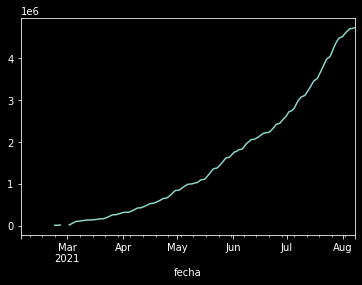

In [13]:
#DOSIS ACUMULADAS TOTAL
primeras_acum = primeras
segundas_acum = segundas
ambas_acum = (primeras + segundas)

primeras_acum.index = pd.to_datetime(primeras_acum.index) 
segundas_acum.index = pd.to_datetime(segundas_acum.index)
ambas_acum.index = pd.to_datetime(ambas_acum.index)

ambas_acum.Bolivia.plot()
ambas_acum

,Bolivia,La Paz,Cochabamba,Santa Cruz,Oruro,Potosí,Chuquisaca,Tarija,Beni,Pando
fecha,,,,,,,,,,
2021-02-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2021-08-04,40.194243,37.937239,41.727649,43.735371,41.441264,23.345011,41.159812,55.496913,32.258750,42.538312
2021-08-05,40.535138,38.241647,42.150468,44.046736,41.784387,23.496341,41.751491,56.190051,32.361042,42.614935
2021-08-06,40.569131,38.267065,42.168359,44.053086,41.808922,23.509867,41.944584,56.385249,32.362500,42.614935


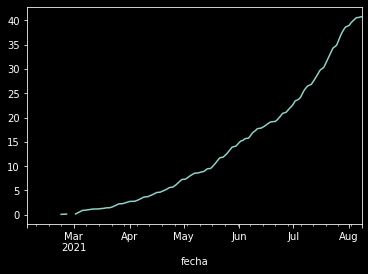

In [14]:
#DOSIS ACUMULADAS POR CADA 100 habitantes
primeras_acum_pc = primeras_acum.div(habitantes.iloc[0])*100
segundas_acum_pc = segundas_acum.div(habitantes.iloc[0])*100
ambas_acum_pc = ambas_acum.div(habitantes.iloc[0]) * 100


ambas_acum_pc.Bolivia.plot()
ambas_acum_pc


,Bolivia,La Paz,Cochabamba,Santa Cruz,Oruro,Potosí,Chuquisaca,Tarija,Beni,Pando
fecha,,,,,,,,,,
2021-02-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


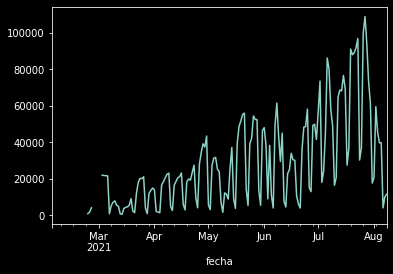

In [15]:
#DOSIS DIARIAS TOTAL
primeras_dia = primeras_acum.diff()
segundas_dia =  segundas_acum.diff()
ambas_dia = ambas_acum.diff()

ambas_dia.Bolivia.plot()
ambas_dia[10:30]

,Bolivia,La Paz,Cochabamba,Santa Cruz,Oruro,Potosí,Chuquisaca,Tarija,Beni,Pando
fecha,,,,,,,,,,
2021-02-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2021-08-04,0.340723,0.326853,0.455052,0.331098,0.334758,0.151885,0.217268,0.752316,0.111042,0.103896
2021-08-05,0.340895,0.304407,0.422819,0.311365,0.343123,0.151330,0.591680,0.693139,0.102292,0.076623
2021-08-06,0.033993,0.025419,0.017891,0.006350,0.024535,0.013525,0.193093,0.195197,0.001458,0.000000


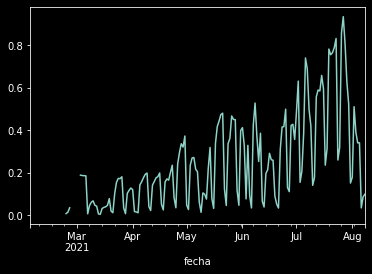

In [16]:
# DIARIAS POR CADA 100 HABITANTES
primeras_dia_pc = primeras_dia.div(habitantes.iloc[0])*100
segundas_dia_pc = segundas_dia.div(habitantes.iloc[0])*100

ambas_dia_pc = ambas_dia.div(habitantes.iloc[0])*100

ambas_dia_pc.Bolivia.plot()
ambas_dia_pc

In [17]:
#RESUMEN NACIONAL
vacunacion_BO_df = pd.concat([primeras_dia.Bolivia,
                              primeras_acum.Bolivia,
                              primeras_acum_pc.Bolivia,
                              segundas_dia.Bolivia,
                              segundas_acum.Bolivia,
                              segundas_acum_pc.Bolivia,
                              ambas_dia.Bolivia,
                              ambas_acum.Bolivia,
                              ambas_acum_pc.Bolivia,
                              ], 
                             axis=1, 
                             keys = ["Primeras Dosis Diarias", 
                                     "Primeras Dosis Acumulado", 
                                     "Primeras Dosis Acumulado, % poblacion",
                                     "Segundas y Janssen Diarias",
                                     "Segundas y Janssen Acumulada", 
                                     "Segundas y Janssen Acumulado, % Poblacion",
                                     "Dosis Todas Diarias",
                                     "Dosis Todas Acumuladas"])

vacunacion_BO_df

,Primeras Dosis Diarias,Primeras Dosis Acumulado,"Primeras Dosis Acumulado, % poblacion",Segundas y Janssen Diarias,Segundas y Janssen Acumulada,"Segundas y Janssen Acumulado, % Poblacion",Dosis Todas Diarias,Dosis Todas Acumuladas
fecha,,,,,,,,
2021-02-03,NaN,3560.0,0.030637,NaN,NaN,NaN,NaN,NaN
2021-02-04,1612.0,5172.0,0.044509,NaN,NaN,NaN,NaN,NaN
2021-02-05,2258.0,7430.0,0.063941,NaN,NaN,NaN,NaN,NaN
2021-02-06,206.0,7636.0,0.065714,NaN,NaN,NaN,NaN,NaN
2021-02-07,116.0,7752.0,0.066713,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2021-08-04,10366.0,2914291.0,25.079957,29226.0,1756280.0,15.114286,39592.0,4670571.0
2021-08-05,9538.0,2923829.0,25.162040,30074.0,1786354.0,15.373098,39612.0,4710183.0
2021-08-06,570.0,2924399.0,25.166945,3380.0,1789734.0,15.402186,3950.0,4714133.0


#Guardar Datos en .CSV

In [18]:
folder=""

primeras_acum.fillna(0).astype(int).to_csv(directory + folder + "Primeras_Acumuladas.csv")
primeras_acum_pc.round(2).to_csv(directory + folder + "Primeras_Acumuladas_PorCada100Hab.csv")
primeras_dia.fillna(0).astype(int).to_csv(directory + folder + "Primeras_Diario.csv")
primeras_dia_pc.round(2).to_csv(directory + folder + "Primeras_Diario_PorCada100Hab.csv")

segundas_acum.fillna(0).astype(int).to_csv(directory + folder + "Segundas_Acumuladas.csv")
segundas_acum_pc.round(2).to_csv(directory + folder + "Segundas_Acumuladas_PorCada100Hab.csv")
segundas_dia.fillna(0).astype(int).to_csv(directory + folder + "Segundas_Diario.csv")
segundas_dia_pc.round(2).to_csv(directory + folder + "Segundas_Diario_PorCada100Hab.csv")

ambas_acum.fillna(0).astype(int).to_csv(directory + folder + "Dosis_Todas_Acumuladas.csv")
ambas_acum_pc.round(2).to_csv(directory + folder + "Dosis_Todas_Acumuladas_PorCada100Hab.csv")
ambas_dia.fillna(0).astype(int).to_csv(directory + folder + "Dosis_Todas_Diarias.csv")
ambas_dia_pc.round(2).to_csv(directory + folder + "Dosis_Todas_Diarias_PorCada100Hab.csv")

vacunacion_BO_df.round(1).to_csv(directory + folder + "Resumen_Nacional_Bolivia_Vacuna.csv")

## #Ultima Actualización

In [19]:
ultima_actualizacion = "última actualización: {}".format(primeras_acum.index[-1].date())
ultima_actualizacion

'última actualización: 2021-08-08'

# Gráficas


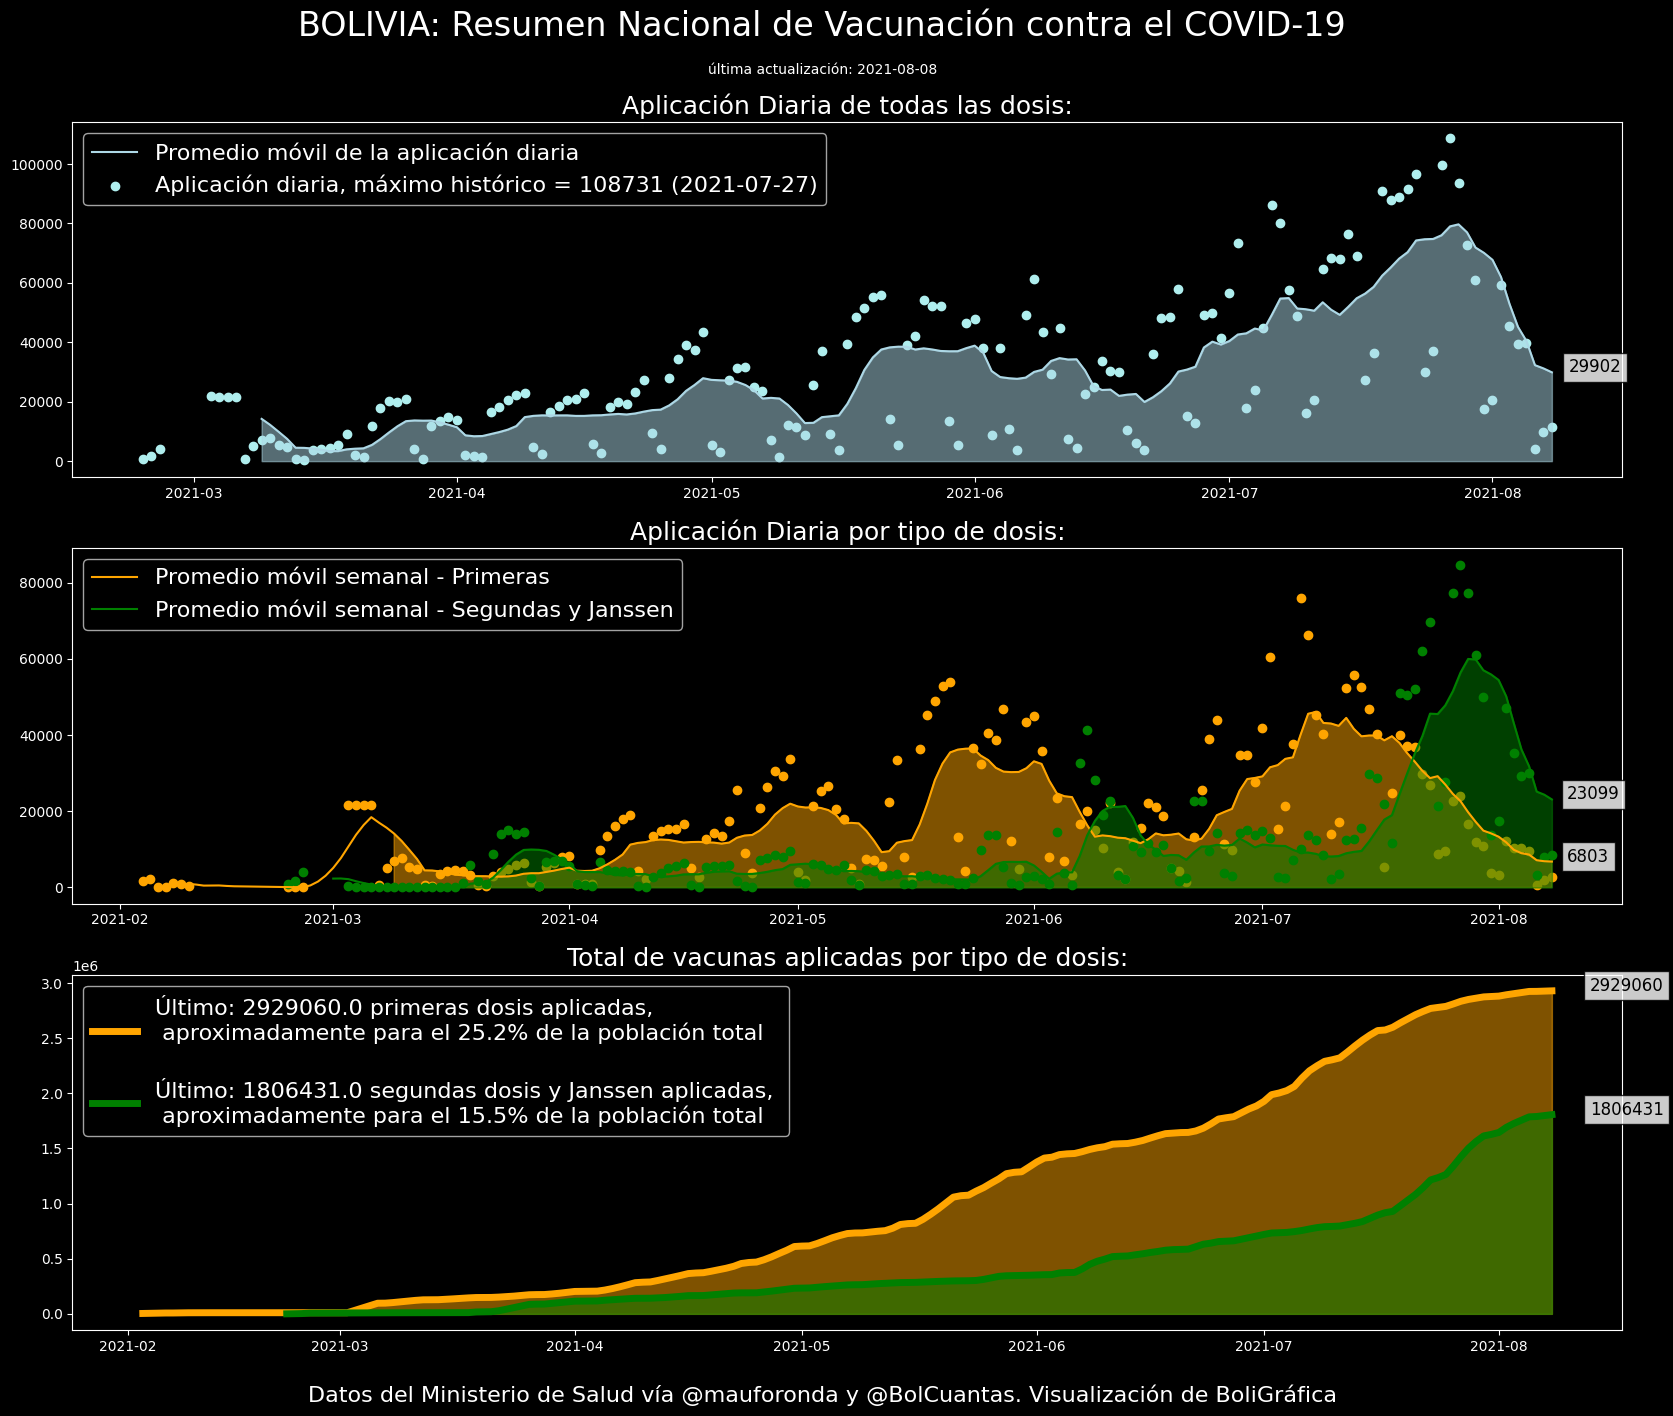

In [20]:
fig, axs = plt.subplots(3,1, sharex=False,
                        figsize=(20,16),
                        dpi=100
                        )

axs = axs.flatten()

fig.suptitle("BOLIVIA: Resumen Nacional de Vacunación contra el COVID-19", fontsize = 24, y=.95)
fig.text(0.5,.91,horizontalalignment='center',s=ultima_actualizacion)
fig.text(0.5,0.08,horizontalalignment='center',s=atribucion, fontsize=16)

fig.set_facecolor(background_color1)




#axs[0].grid(zorder=0)
axs[0].set_title("Aplicación Diaria de todas las dosis:", fontsize=18)
axs[0].scatter(ambas_dia.index, ambas_dia.Bolivia, color=color_total_dosis1, label="Aplicación diaria, máximo histórico = {} ({})".format(ambas_dia.Bolivia.fillna(0).astype(int).max(), ambas_dia.Bolivia.idxmax().date())) 
axs[0].plot(ambas_dia.index, ambas_dia.Bolivia.rolling(7).mean(), color=color_total_dosis2,label="Promedio móvil de la aplicación diaria")
axs[0].fill_between(ambas_dia.Bolivia.index, ambas_dia.Bolivia.rolling(7).mean(), color=color_total_dosis2, alpha=.5)
axs[0].legend(fontsize=16)
annotate_last_flat(df=ambas_dia.rolling(7).mean().fillna(0).astype(int), column_index=0, axis = 0, offset_days=2, alpha=.8)



#axs[1].grid(zorder=0)
axs[1].set_title("Aplicación Diaria por tipo de dosis:", fontsize=18)
axs[1].scatter(primeras_dia.index, primeras_dia.Bolivia, color=color_vac_parcial1) 
axs[1].plot(primeras_dia.index, primeras_dia.Bolivia.interpolate().rolling(7).mean(), color=color_vac_parcial2, label="Promedio móvil semanal - Primeras")
axs[1].fill_between(primeras_dia.Bolivia.index, primeras_dia.Bolivia.rolling(7).mean(), color=color_vac_parcial2, alpha=.5)
annotate_last_flat(df=primeras_dia.rolling(7).mean().round().fillna(0).astype(int), column_index=0, axis = 1, offset_days=2, alpha=.8)

axs[1].scatter(segundas_dia.index, segundas_dia.Bolivia, color=color_vac_completa1) 
axs[1].plot(segundas_dia.index, segundas_dia.Bolivia.interpolate().rolling(7).mean(), color=color_vac_completa2,label="Promedio móvil semanal - Segundas y Janssen")
axs[1].fill_between(segundas_dia.Bolivia.index, segundas_dia.Bolivia.rolling(7).mean(), color=color_vac_completa2, alpha=.5)
axs[1].legend(fontsize=16)
annotate_last_flat(df=segundas_dia.rolling(7).mean().round().fillna(0).astype(int), column_index=0, axis = 1, offset_days=2, alpha=.8)





#axs[2].grid(zorder=1)
axs[2].set_title("Total de vacunas aplicadas por tipo de dosis:", fontsize=18)
axs[2].plot(primeras_acum.Bolivia.interpolate(), color=color_vac_parcial2, linewidth=5, 
            label="Último: {} primeras dosis aplicadas, \n aproximadamente para el {}% de la población total \n".format(primeras_acum.Bolivia[-1],primeras_acum_pc.Bolivia[-1].round(1)))
axs[2].fill_between(primeras_acum.Bolivia.index, primeras_acum.Bolivia.interpolate(), color=color_vac_parcial1, alpha=.5)

annotate_last_flat(df=primeras_acum.fillna(0).astype(int), column_index=0, axis = 2, offset_days=5, alpha=.8,
                   #end_text="{} segundas dosis y Janssen aplicadas, lo cual cubre \n aproximadamente el {}% de la población total".format(segundas_acum.Bolivia[-1],segundas_acum_pc.Bolivia[-1].round())
                   )

axs[2].plot(segundas_acum.Bolivia.interpolate(), color=color_vac_completa2,linewidth=5, 
            label="Último: {} segundas dosis y Janssen aplicadas, \n aproximadamente para el {}% de la población total".format(segundas_acum.Bolivia[-1],segundas_acum_pc.Bolivia[-1].round(1)))
axs[2].fill_between(segundas_acum.Bolivia.index, segundas_acum.Bolivia.interpolate(), color=color_vac_completa1, alpha=.5)
axs[2].legend(fontsize=16)
annotate_last_flat(df=segundas_acum.fillna(0).astype(int), column_index=0, axis = 2, offset_days=5, alpha=.8,
                    #end_text=" segundas dosis y Janssen aplicadas, lo cual cubre \n aproximadamente el {}% de la población total".format(segundas_acum_pc.Bolivia[-1].round())
                    )

fig.savefig(directory + "resumen_nacional.jpg", bbox_inches="tight")

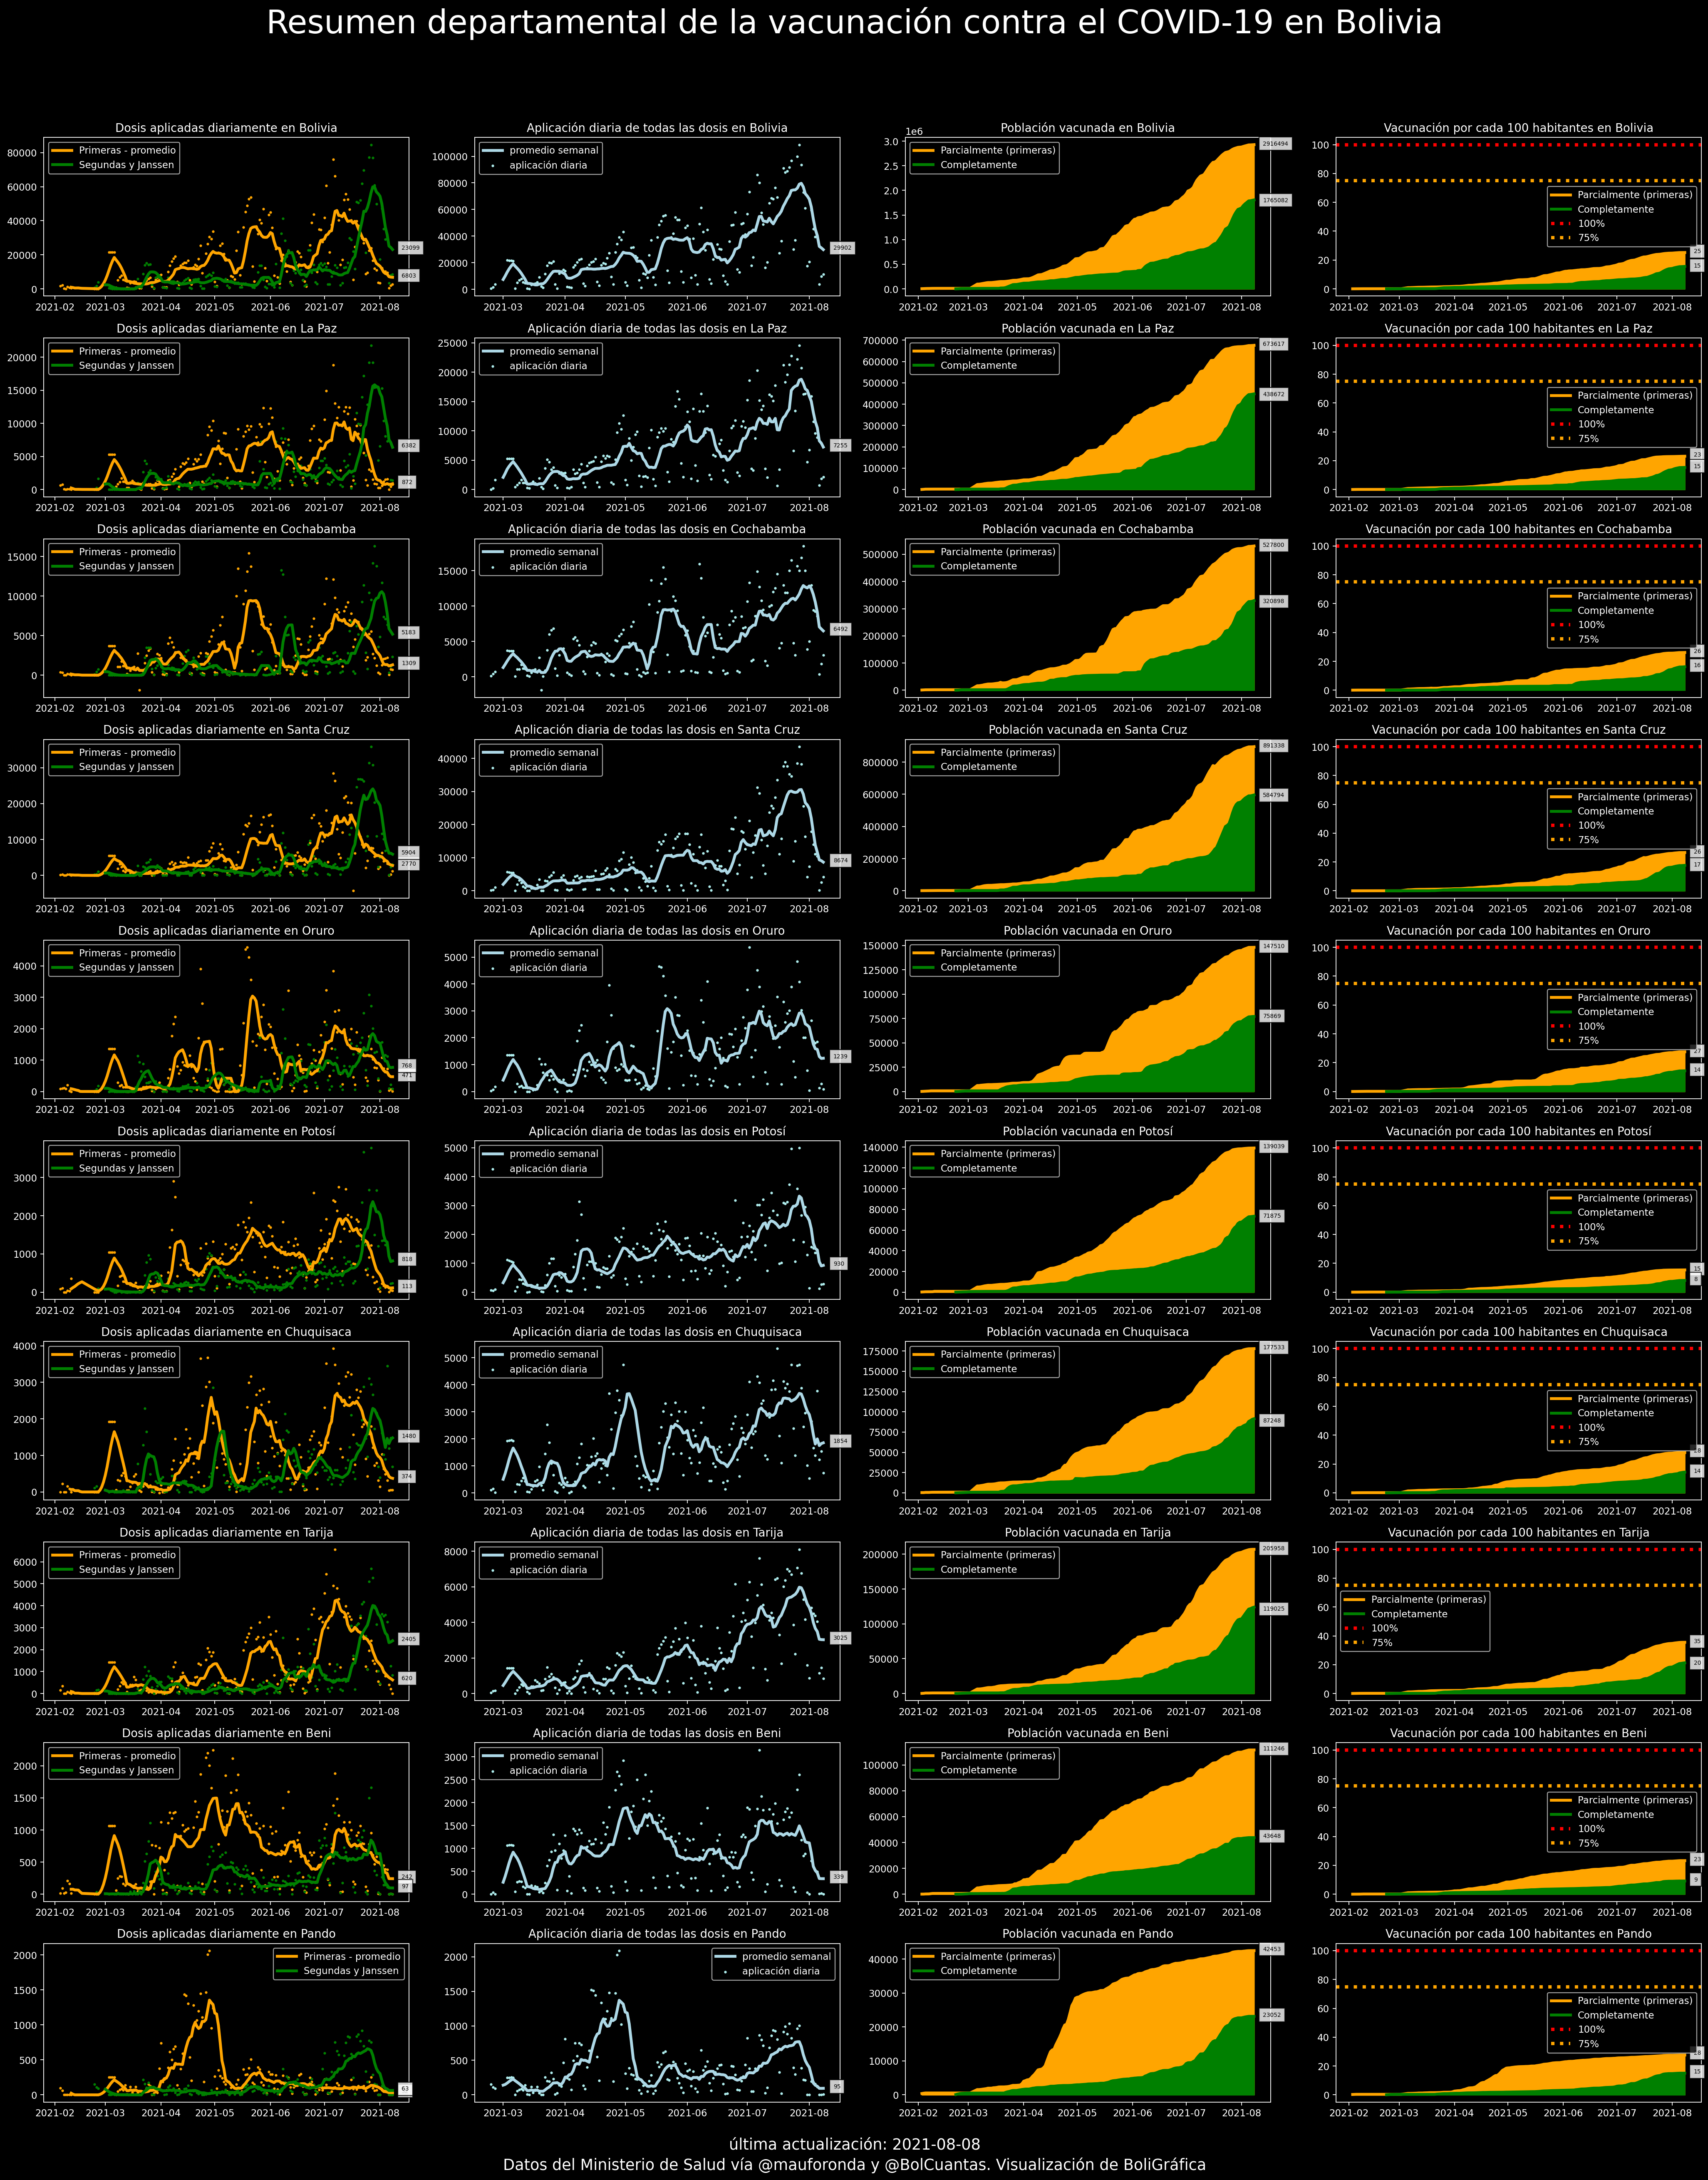

In [21]:
fig, axs = plt.subplots(10,4, figsize = (25,30),
                        dpi = 165
                        )
#axs = axs.flatten()
fig.suptitle("Resumen departamental de la vacunación contra el COVID-19 en Bolivia", y=1.03, fontsize = 34)
fig.text(0.5,-.01,horizontalalignment='center',s=ultima_actualizacion, fontsize=16)
fig.text(0.5,-.02,horizontalalignment='center',s=atribucion, fontsize=16)

fig.set_facecolor(background_color1)



for i in range(10):
  #axs[i,0].grid(zorder=1)
  axs[i,0].set_title("Dosis aplicadas diariamente en {}".format(primeras_dia.columns[i]))
  axs[i,0].scatter(primeras_dia.index, primeras_dia.iloc[:,i], color = color_vac_parcial1, s=3, zorder=2)
  axs[i,0].plot(primeras_dia.index, primeras_dia.iloc[:,i].interpolate().rolling(7).mean(),color = color_vac_parcial2, label="Primeras - promedio", linewidth = 3, zorder=3)
  axs[i,0].scatter(segundas_dia.index, segundas_dia.iloc[:,i], color = color_vac_completa1, s=3, zorder=2)
  axs[i,0].plot(segundas_dia.index, segundas_dia.iloc[:,i].interpolate().rolling(7).mean(),color = color_vac_completa2, label="Segundas y Janssen", linewidth = 3, zorder=3)  
  axs[i,0].legend()
  annotate_last_nonflat(primeras_dia.rolling(7).mean().round().fillna(0).astype(int), i, axis=(i,0), text_color="black", fontsize=6, offset_days=5, edgecolor="black", facecolor="white", alpha=0.8)
  annotate_last_nonflat(segundas_dia.rolling(7).mean().round().fillna(0).astype(int), i, axis=(i,0), text_color="black", fontsize=6, offset_days=5, edgecolor="black", facecolor="white", alpha=0.8)


for i in range(10):
 # axs[i,1].grid(zorder=1)
  axs[i,1].set_title("Aplicación diaria de todas las dosis en {}".format(primeras_dia.columns[i]))
  axs[i,1].scatter(ambas_dia.index, ambas_dia.iloc[:,i], color = color_total_dosis1, label="aplicación diaria", s=3, zorder=2)
  axs[i,1].plot(ambas_dia.index, ambas_dia.iloc[:,i].interpolate().rolling(7).mean(),color = color_total_dosis2, label="promedio semanal", linewidth = 3, zorder=3)
  axs[i,1].legend()
  annotate_last_nonflat(ambas_dia.rolling(7).mean().round().fillna(0).astype(int), i, axis=(i,1), text_color="black", fontsize=6, offset_days=5, edgecolor="black", facecolor="white", alpha=0.8)


for i in range(10):
  #axs[i,2].grid(zorder=1)
  axs[i,2].set_title("Población vacunada en {}".format(primeras_dia.columns[i]))
  axs[i,2].plot(primeras_acum.iloc[:,i].interpolate(), label = "Parcialmente (primeras)", color= color_vac_parcial2, linewidth = 3, zorder=2)
  axs[i,2].fill_between(primeras_acum.index, primeras_acum.iloc[:,i].interpolate(),color= color_vac_parcial1,zorder=2)
  axs[i,2].plot(segundas_acum.iloc[:,i].interpolate(), label = "Completamente",color= color_vac_completa2, linewidth = 3, zorder=3)
  axs[i,2].fill_between(segundas_acum.index, segundas_acum.iloc[:,i].interpolate(),color= color_vac_completa1, zorder=3)
  axs[i,2].legend()
  annotate_last_nonflat(primeras_acum.rolling(7).mean().round().fillna(0).astype(int), i, axis=(i,2), text_color="black", fontsize=6, offset_days=5, edgecolor="black", facecolor="white", alpha=0.8)
  annotate_last_nonflat(segundas_acum.rolling(7).mean().round().fillna(0).astype(int), i, axis=(i,2), text_color="black", fontsize=6, offset_days=5, edgecolor="black", facecolor="white", alpha=0.8)

for i in range(10):
  #axs[i,3].grid(zorder=1)
  axs[i,3].set_title("Vacunación por cada 100 habitantes en {}".format(primeras_dia.columns[i]))
  axs[i,3].plot(primeras_acum_pc.iloc[:,i].interpolate(), label = "Parcialmente (primeras)", color= color_vac_parcial2, linewidth = 3, zorder=2)
  axs[i,3].fill_between(primeras_acum_pc.index, primeras_acum_pc.iloc[:,i].interpolate(),color= color_vac_parcial1,zorder=2)
  axs[i,3].plot(segundas_acum_pc.iloc[:,i].interpolate(), label = "Completamente",color= color_vac_completa2, linewidth = 3, zorder=3)
  axs[i,3].fill_between(segundas_acum_pc.index, segundas_acum_pc.iloc[:,i].interpolate(),color= color_vac_completa1, zorder=3)
  axs[i,3].axhline(y=100, color='red', linestyle='dotted',label="100%", linewidth=3.5)
  axs[i,3].axhline(y=75, color='orange', linestyle='dotted',label="75%", linewidth=3.5)
  axs[i,3].legend()
  annotate_last_nonflat(primeras_acum_pc.rolling(7).mean().round().fillna(0).astype(int), i, axis=(i,3), text_color="black", fontsize=6, offset_days=5, edgecolor="black", facecolor="white", alpha=0.8)
  annotate_last_nonflat(segundas_acum_pc.rolling(7).mean().round().fillna(0).astype(int), i, axis=(i,3), text_color="black", fontsize=6, offset_days=5, edgecolor="black", facecolor="white", alpha=0.8)

fig.tight_layout()

fig.savefig(directory + "resumen_detallado.jpg", bbox_inches="tight")

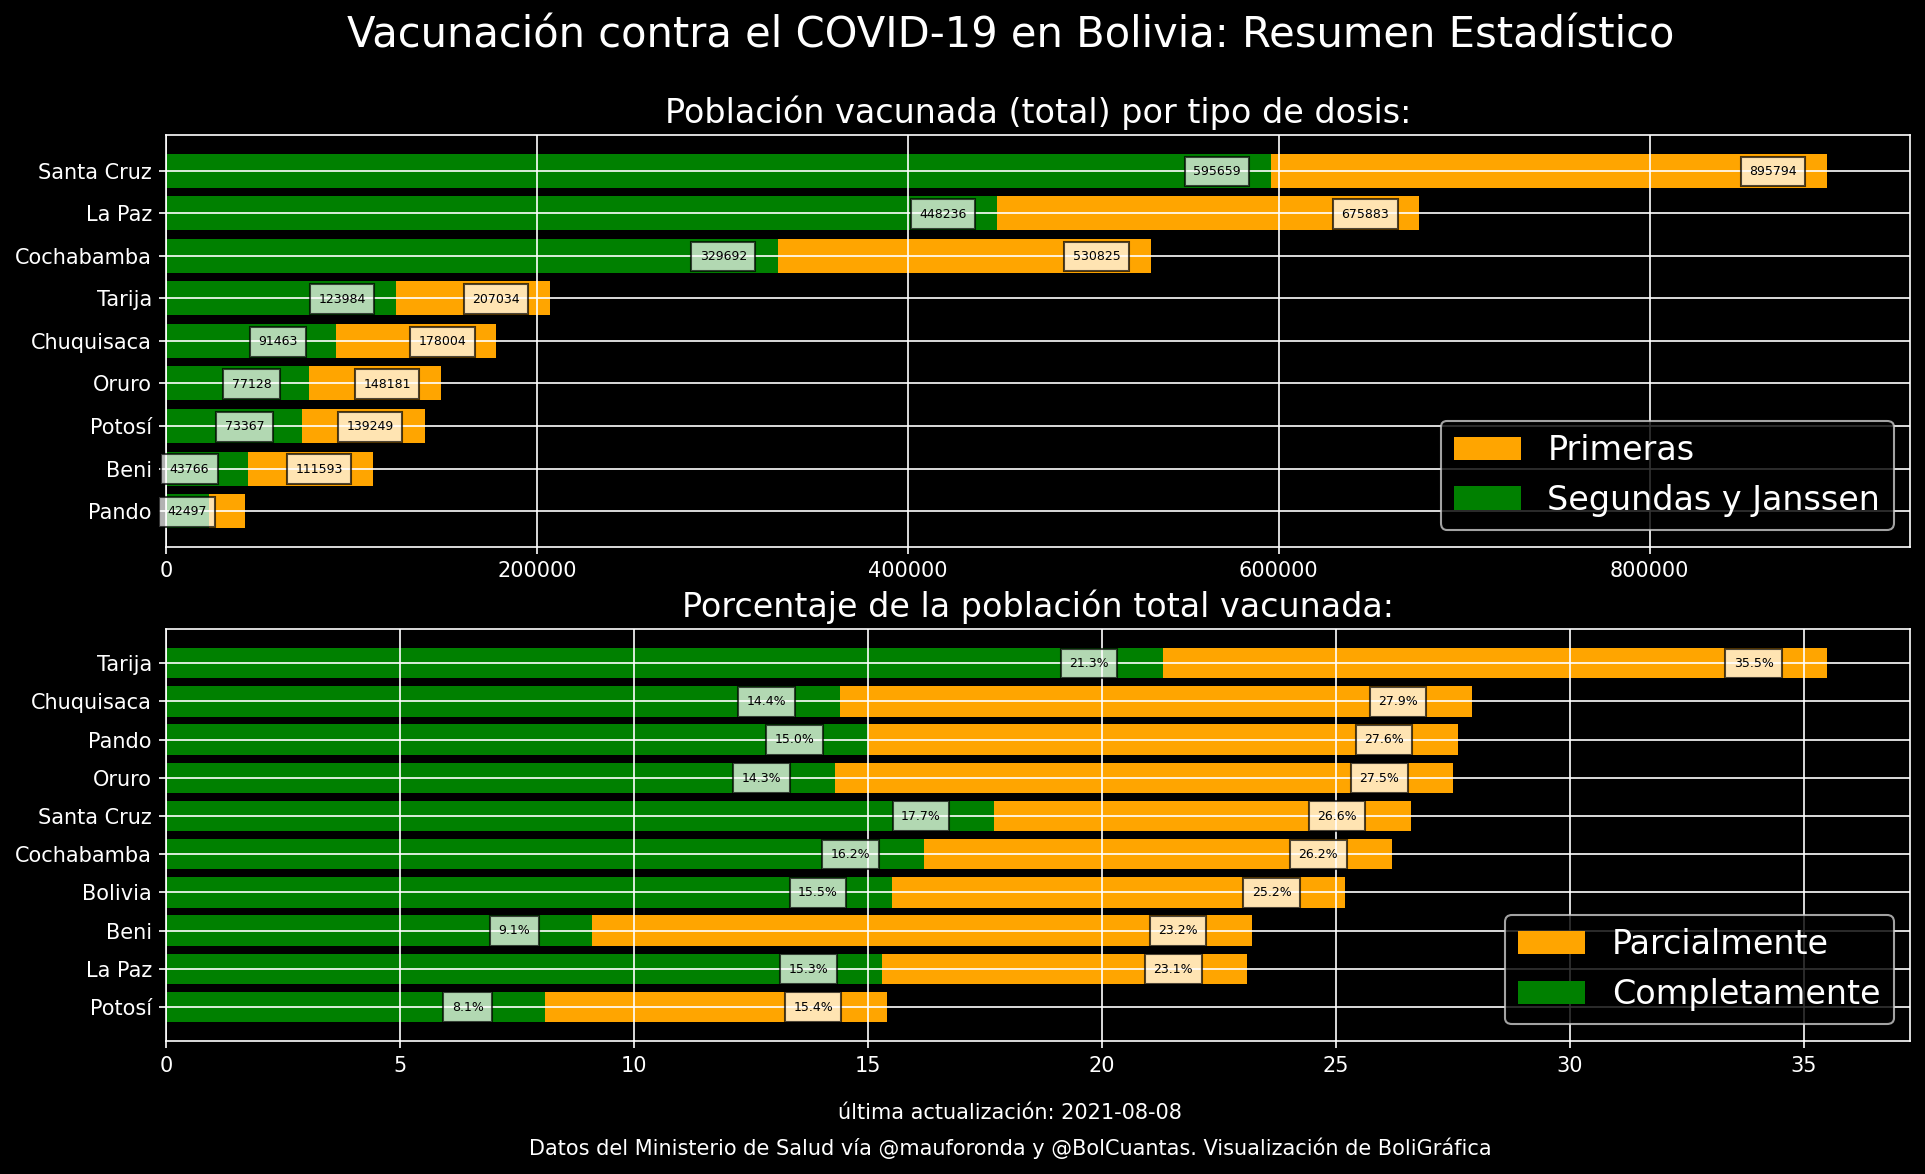

In [22]:
fig, axs = plt.subplots(2,1, figsize=(15,8),dpi=150)
axs=axs.flatten()

fig.suptitle("Vacunación contra el COVID-19 en Bolivia: Resumen Estadístico", fontsize=20)
fig.text(0.5,.06,horizontalalignment='center',s=ultima_actualizacion)
fig.text(0.5,0.03,horizontalalignment='center',s=atribucion, fontsize=10)

fig.set_facecolor(background_color1)

sort_primeras = primeras_acum.iloc[-1,1:10].sort_values(ascending=True).fillna(0).astype(int)
sort_segundas = segundas_acum.iloc[-1,1:10].sort_values(ascending=True).fillna(0).astype(int)
axs[0].grid(zorder=1)
axs[0].set_title("Población vacunada (total) por tipo de dosis:", fontsize=16)
axs[0].barh(sort_primeras.index, sort_primeras, label="Primeras", color=color_vac_parcial2)
axs[0].barh(sort_segundas.index, sort_segundas, label="Segundas y Janssen", color=color_vac_completa2)
axs[0].legend(fontsize=16)
annotate_bar(sort_primeras,0, fontsize=6, y_offset=.3, x_offset=-42000, alpha=.7)



sort_primeras = primeras_acum_pc.iloc[-1,:].sort_values(ascending=True).round(1)
sort_segundas = segundas_acum_pc.iloc[-1,:].sort_values(ascending=True).round(1)
axs[1].grid(zorder=1)
axs[1].set_title("Porcentaje de la población total vacunada:", fontsize=16)
axs[1].barh(sort_primeras.index, sort_primeras, label="Parcialmente", color=color_vac_parcial2)
axs[1].barh(sort_segundas.index, sort_segundas, label="Completamente", color=color_vac_completa2)
axs[1].legend(fontsize=16)
annotate_bar(sort_primeras,1, fontsize=6, y_offset=.3, x_offset=-2, alpha=.7, end_text="%")


fig.savefig(directory + "resumen_departamental.jpg", bbox_inches="tight")